# 첫 번째 신경망 훈련하기 - 기초적인 분류 문제
https://www.tensorflow.org/tutorials/keras/classification?hl=ko

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0-dev20201230


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
# 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape # len(train_labels)

(60000,)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

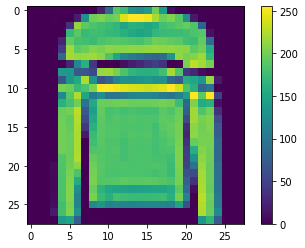

In [10]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

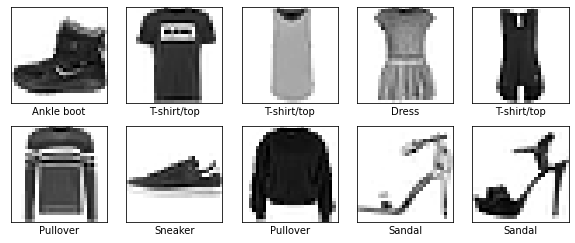

In [17]:
plt.figure(figsize=(10, 4)) # width, height 순
for i in range(10): 
    plt.subplot(2, 5, i+1) # row, colums 순
    plt.xticks([]) # Disable xticks.
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # image size와 다르게 하면 어떻게 될까? # 학습되는 가중치는 없고, 형태 변환만
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

- 손실 함수(Loss function): 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
- 옵티마이저(Optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다.

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 695us/step - loss: 0.6339 - accuracy: 0.7781
Epoch 2/5
1875/1875 [==============================] - 1s 692us/step - loss: 0.3877 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.3319 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 1s 701us/step - loss: 0.3192 - accuracy: 0.8837
Epoch 5/5
1875/1875 [==============================] - 1s 699us/step - loss: 0.3011 - accuracy: 0.8907


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3505 - accuracy: 0.8781


In [23]:
pred = model.predict(test_images)

In [27]:
pred[0]

array([4.4861022e-06, 3.9824833e-08, 1.9983765e-06, 2.7221301e-07,
       3.3856093e-06, 2.3125678e-03, 6.6065495e-06, 1.1071632e-02,
       7.4556078e-06, 9.8659164e-01], dtype=float32)

In [26]:
print(np.argmax(pred[0]), test_labels[0])

9 9


In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    predicted_class = class_names[predicted_label]
    true_class = class_names[true_label]
    plt.xlabel(f'{predicted_class} {round(100*np.max(predictions_array))}% ({true_class})', color=color)
    

In [30]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

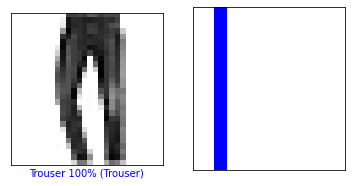

In [34]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

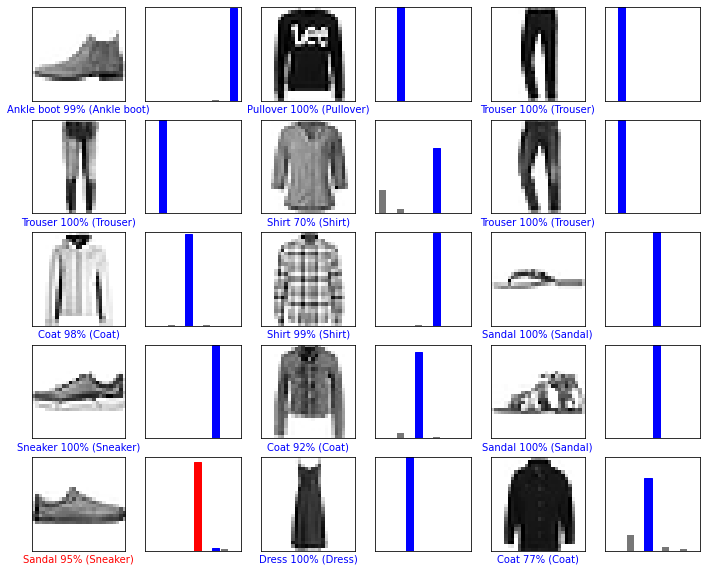

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols*2, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, num_cols*2, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [49]:
k = 0
img = test_images[k]

In [41]:
img.shape

(28, 28)

- tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [44]:
(np.expand_dims(img, 0)).shape

(1, 28, 28)

In [45]:
img = np.expand_dims(img, 0)

In [57]:
predictions_single = model.predict(img)
print(np.argmax(predictions_single), predictions_single)

ValueError: in user code:

    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1513 predict_function  *
        return step_function(self, iterator)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1503 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1263 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2735 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3424 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1496 run_step  **
        outputs = model.predict_step(data)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1469 predict_step
        return self(x, training=False)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1019 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:384 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:427 call
        inputs, training=training, mask=mask)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:562 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1005 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/wonji/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 28)


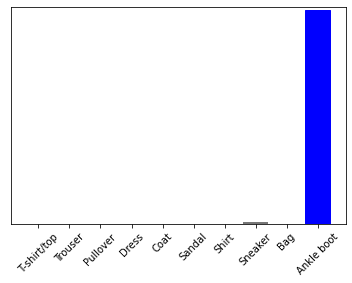

In [54]:
plot_value_array(k, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)